<a href="https://colab.research.google.com/github/DrJHSIM/App_timeseries/blob/main/chatgpt_timeseries_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

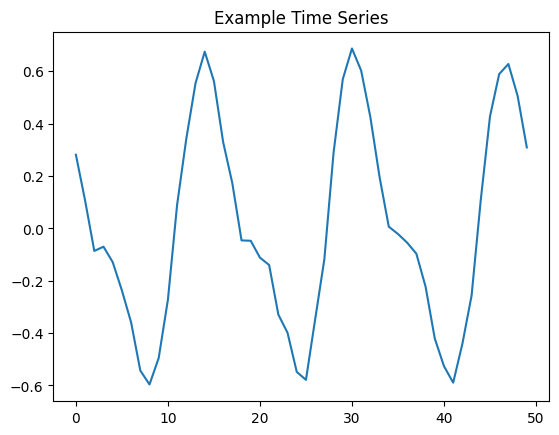

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 생성
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  # 주기 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))  # 주기 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)    # 잡음 추가
    return series[..., np.newaxis]  # shape: (batch_size, n_steps, 1)

n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

plt.plot(X_train[0, :, 0])  # 첫 번째 샘플 시계열
plt.title("Example Time Series")
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 시계열 모델 정의
model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(n_steps, 1)),
    LSTM(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,985 (195.25 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - loss: 1.0221 - mae: 0.2621 - val_loss: 0.1163 - val_mae: 0.2960
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 16s 74ms/step - loss: 0.0630 - mae: 0.2025 - val_loss: 0.0243 - val_mae: 0.1286
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - loss: 0.0177 - mae: 0.1071 - val_loss: 0.0072 - val_mae: 0.0690
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - loss: 0.0069 - mae: 0.0670 - val_loss: 0.0046 - val_mae: 0.0551
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - loss: 0.0049 - mae: 0.0567 - val_loss: 0.0037 - val_mae: 0.0487
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - loss: 0.0044 - mae: 0.0531 - val_loss: 0.0038 - val_mae: 0.0496
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - loss: 0.0038 - mae: 0.0493 - val_loss: 0.0039 - val_mae: 0.0506
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - loss: 0.0035 - mae: 0.0479 - val_loss: 0.0031 - val_mae: 0.0447
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 

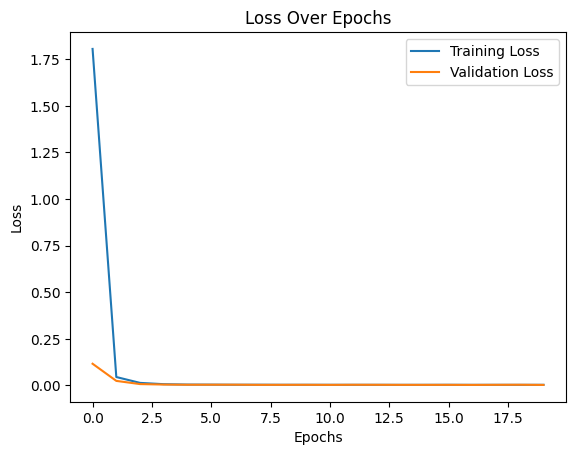

In [ ]:
# 모델 훈련
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_valid, y_valid)
)

# 학습 곡선 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0029 - mae: 0.0439
Test Loss: 0.0028, Test MAE: 0.0427
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step


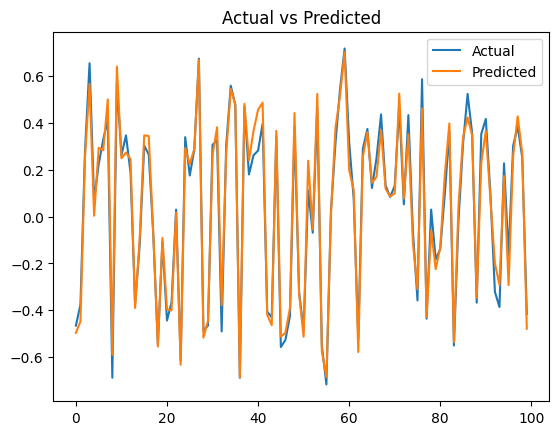

In [ ]:
# 모델 평가
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# 예측 수행
y_pred = model.predict(X_test)

# 실제 값과 예측 값 비교
plt.plot(y_test[:100], label="Actual")
plt.plot(y_pred[:100], label="Predicted")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()


In [ ]:
tf.saved_model.save(model, "saved_model_keras_dir")

# TFLite 변환
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# TFLite 모델 저장
with open("your_model.tflite", "wb") as f:
    f.write(tflite_model)

print("TensorFlow Lite 모델 변환 완료!")


Saved artifact at '/tmp/tmpbfzdz7x_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 50, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134671320893568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134671320576272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134671320895504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134671320903248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134671320905536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134671320907296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134671320903952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134671320903600: TensorSpec(shape=(), dtype=tf.resource, name=None)


ConverterError: Variable constant folding is failed. Please consider using enabling `experimental_enable_resource_variables` flag in the TFLite converter object. For example, converter.experimental_enable_resource_variables = True<unknown>:0: error: loc(callsite(callsite(fused["TensorListReserve:", "sequential_1/lstm_1/TensorArrayV2_1@__inference_function_64873"] at fused["StatefulPartitionedCall:", "StatefulPartitionedCall@__inference_signature_wrapper_64916"]) at fused["StatefulPartitionedCall:", "StatefulPartitionedCall_1"])): 'tf.TensorListReserve' op requires element_shape to be static during TF Lite transformation pass
<unknown>:0: note: loc(fused["StatefulPartitionedCall:", "StatefulPartitionedCall_1"]): called from
<unknown>:0: error: loc(callsite(callsite(fused["TensorListReserve:", "sequential_1/lstm_1/TensorArrayV2_1@__inference_function_64873"] at fused["StatefulPartitionedCall:", "StatefulPartitionedCall@__inference_signature_wrapper_64916"]) at fused["StatefulPartitionedCall:", "StatefulPartitionedCall_1"])): failed to legalize operation 'tf.TensorListReserve' that was explicitly marked illegal
<unknown>:0: note: loc(fused["StatefulPartitionedCall:", "StatefulPartitionedCall_1"]): called from
<unknown>:0: error: Lowering tensor list ops is failed. Please consider using Select TF ops and disabling `_experimental_lower_tensor_list_ops` flag in the TFLite converter object. For example, converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]\n converter._experimental_lower_tensor_list_ops = False
